# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Importing Libraries</a></div><div class="lev2 toc-item"><a href="#Import-the-CSV-file" data-toc-modified-id="Import-the-CSV-file-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Import the CSV file</a></div><div class="lev2 toc-item"><a href="#Basic-Exploration" data-toc-modified-id="Basic-Exploration-03"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Basic Exploration</a></div><div class="lev2 toc-item"><a href="#Weapons-Used" data-toc-modified-id="Weapons-Used-04"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Weapons Used</a></div><div class="lev2 toc-item"><a href="#Unsolved-Crimes" data-toc-modified-id="Unsolved-Crimes-05"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Unsolved Crimes</a></div><div class="lev2 toc-item"><a href="#Month" data-toc-modified-id="Month-06"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Month</a></div><div class="lev2 toc-item"><a href="#Agency-Type" data-toc-modified-id="Agency-Type-07"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>Agency Type</a></div><div class="lev2 toc-item"><a href="#Removing-Death-by-Negligence" data-toc-modified-id="Removing-Death-by-Negligence-08"><span class="toc-item-num">0.8&nbsp;&nbsp;</span>Removing Death by Negligence</a></div><div class="lev2 toc-item"><a href="#Exploring-Relationship-Between-Victims-and-Perpetrators" data-toc-modified-id="Exploring-Relationship-Between-Victims-and-Perpetrators-09"><span class="toc-item-num">0.9&nbsp;&nbsp;</span>Exploring Relationship Between Victims and Perpetrators</a></div><div class="lev2 toc-item"><a href="#Race" data-toc-modified-id="Race-010"><span class="toc-item-num">0.10&nbsp;&nbsp;</span>Race</a></div>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,5) # This can be the default, or else, you can also specify this every time you generate a graph

In [3]:
import vincent
vincent.core.initialize_notebook()

## Import the CSV file

In [5]:
# Note: You will have to unzip the file, as Github has a file size limit of 100mb
df = pd.read_csv("Data/database/database.csv")

C:\Users\madan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Basic Exploration

In [6]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [7]:
df.shape

(638454, 24)

In [8]:
df.set_index(["Record ID"],inplace = True)

In [9]:
df.head()

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
Record ID,,,,,,,,,,,,,,,,,,,,,
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [10]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

Our dataset seems really clean, without any missing values, which is wonderful!

In [11]:
df.describe()

,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,1995.801102,22.967924,35.033512,0.123334,0.185224
std,9.927693,92.149821,41.628306,0.537733,0.585496
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,2004.000000,10.000000,42.000000,0.000000,0.000000
max,2014.000000,999.000000,998.000000,10.000000,10.000000


## Weapons Used

In [12]:
df["Weapon"].head()

Record ID
1     Blunt Object
2    Strangulation
3          Unknown
4    Strangulation
5          Unknown
Name: Weapon, dtype: object

Can the scale we deploy for graphics, affect our perception of the nature of the data? Let's check different configurations.

Text(0.5,1,'Deaths Attributable to Various Weapons')

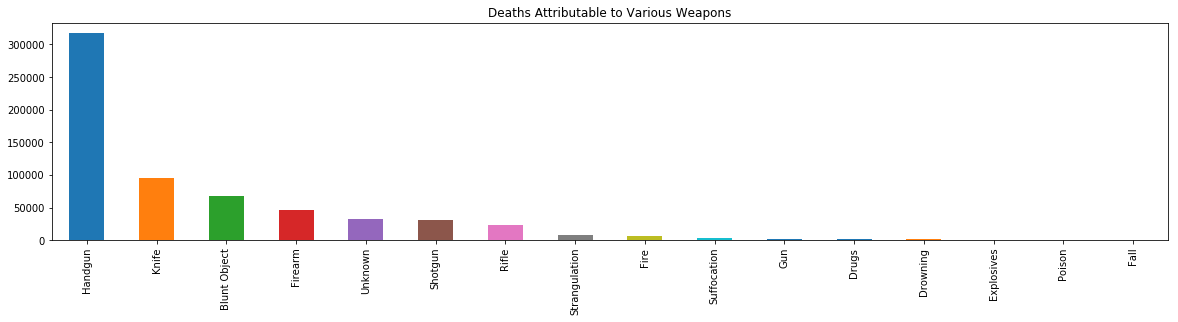

In [13]:
plt.rcParams["figure.figsize"] = (20,4)
df["Weapon"].value_counts().plot(kind = "bar")
plt.title('Deaths Attributable to Various Weapons')

Text(0.5,1,'Deaths Attributable to Various Weapons')

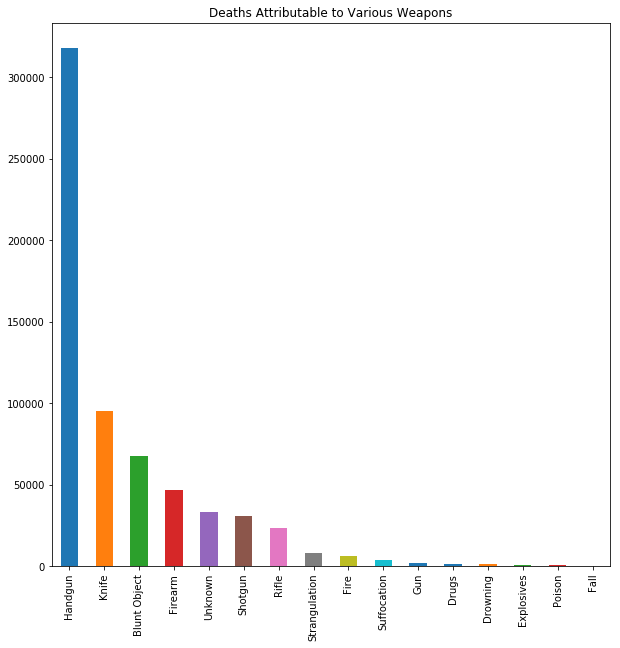

In [14]:
plt.rcParams["figure.figsize"] = (10,10)
df["Weapon"].value_counts().plot(kind = "bar")
plt.title('Deaths Attributable to Various Weapons')

Text(0.5,1,'Deaths Attributable to Various Weapons')

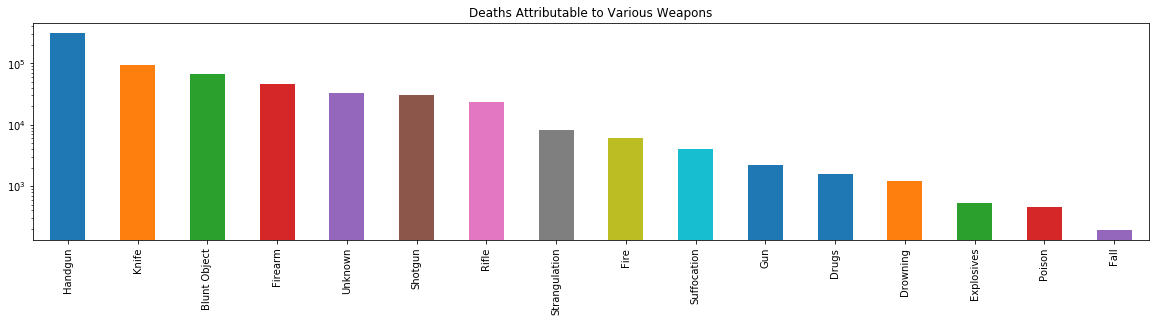

In [15]:
plt.rcParams["figure.figsize"] = (20,4)
plt.yscale('log', nonposy='clip')
df["Weapon"].value_counts().plot(kind = "bar")
plt.title('Deaths Attributable to Various Weapons')

## Unsolved Crimes

Let's pay some attention to unsolved crimes. What are their characteristics?

In [16]:
df[df["Crime Solved"] != "Yes"].shape

(190282, 23)

In [17]:
unsolved = df[df["Crime Solved"] != "Yes"]

In [18]:
unsolved.head()

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
Record ID,,,,,,,,,,,,,,,,,,,,,
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
11,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,1,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
15,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,August,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI


In [19]:
unsolved.describe()

,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,190282.000000,190282.000000,190282.000000,190282.000000,190282.000000
mean,1996.203934,25.797112,37.448434,0.101476,0.035284
std,9.753870,89.272799,57.194890,0.431139,0.209370
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,1988.000000,1.000000,22.000000,0.000000,0.000000
50%,1995.000000,4.000000,29.000000,0.000000,0.000000
75%,2005.000000,16.000000,41.000000,0.000000,0.000000
max,2014.000000,999.000000,998.000000,9.000000,8.000000


Text(0.5,1,'Number of Unsolved Homicides: 1980 to 2014')

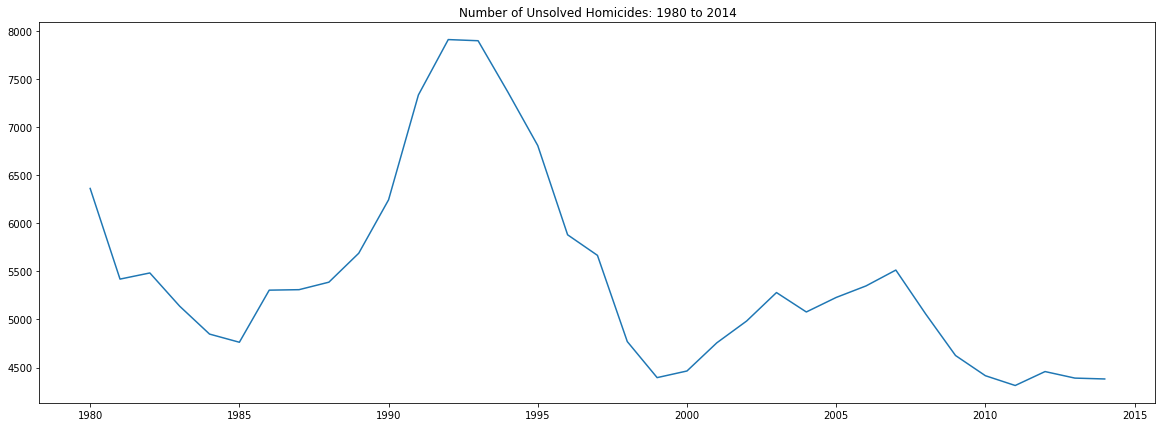

In [20]:
plt.rcParams["figure.figsize"] = (20,7)
unsolved['Year'].value_counts().sort_index(ascending=True).plot(kind='line')
plt.title('Number of Unsolved Homicides: 1980 to 2014')

In [21]:
dict_states = {'Alaska':'AK','Alabama':'AL','Arkansas':'AR','Arizona':'AZ', 'California':'CA', 'Colorado':'CO', 'Connecticut':'CT', 
'District of Columbia':'DC', 'Delaware':'DE', 'Florida':'FL', 'Georgia':'GA', 'Hawaii':'HI', 'Iowa':'IA', 
'Idaho':'ID', 'Illinois':'IL', 'Indiana':'IN', 'Kansas':'KS', 'Kentucky':'KY', 'Louisiana':'LA', 
'Massachusetts':'MA', 'Maryland':'MD', 'Maine':'ME', 'Michigan':'MI', 'Minnesota':'MN', 'Missouri':'MO', 
'Mississippi':'MS', 'Montana':'MT', 'North Carolina':'NC', 'North Dakota':'ND', 'Nebraska':'NE', 
'New Hampshire':'NH', 'New Jersey':'NJ', 'New Mexico':'NM', 'Nevada':'NV', 'New York':'NY', 'Ohio':'OH', 
'Oklahoma':'OK', 'Oregon':'OR', 'Pennsylvania':'PA', 'Puerto Rico':'PR', 'Rhode Island':'RI', 
'South Carolina':'SC', 'South Dakota':'SD', 'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 
'Virginia':'VA', 'Vermont':'VT', 'Washington':'WA', 'Wisconsin':'WI', 'West Virginia':'WV', 'Wyoming':'WY'}


In [22]:
abb_st = [val for val in dict_states.values()]    
len(abb_st)

52

Text(0.5,1,'Unsolved Homicides Caused By Handguns')

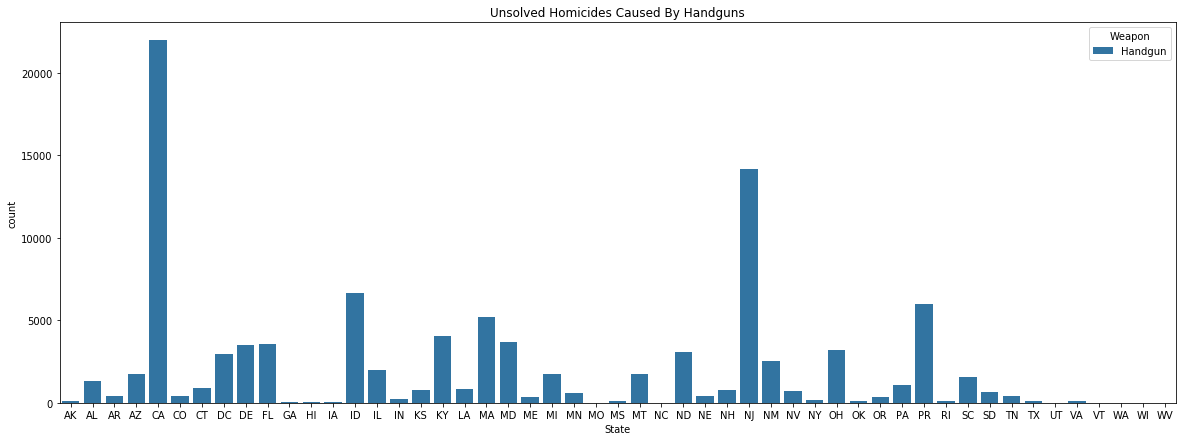

In [23]:
plt.rcParams["figure.figsize"] = (20,7)
ax = sns.countplot(x="State", hue="Weapon", data=unsolved[unsolved["Weapon"]=="Handgun"])
ax.set_xticklabels(abb_st)
plt.title("Unsolved Homicides Caused By Handguns")

In [24]:
unsolved['Weapon'].value_counts()

Handgun          100546
Firearm           22578
Knife             20204
Blunt Object      15833
Unknown           14783
Shotgun            4682
Strangulation      3701
Rifle              3401
Fire               2034
Suffocation         990
Gun                 882
Drowning            205
Drugs               192
Explosives          149
Poison               78
Fall                 24
Name: Weapon, dtype: int64

In [25]:
plt.rcParams["figure.figsize"] = (15,10)

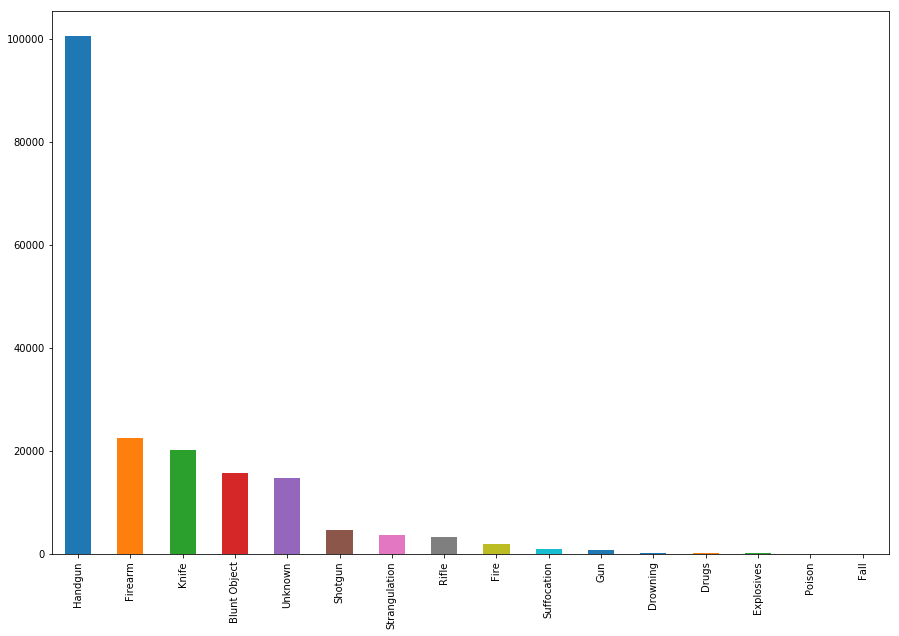

In [26]:
unsolved['Weapon'].value_counts().plot(kind='bar')

In [29]:
bar = vincent.Bar(unsolved['State'].value_counts())
bar.x_axis_properties(label_angle = 180+90, label_align = "right")
bar.legend(title = "Unsolved Homicides: Weapons Involved")
bar

In [30]:
# Team_Before = df['Punches Before'].groupby(df['Team'])
rel = unsolved['Weapon'].groupby(unsolved['Victim Sex'])

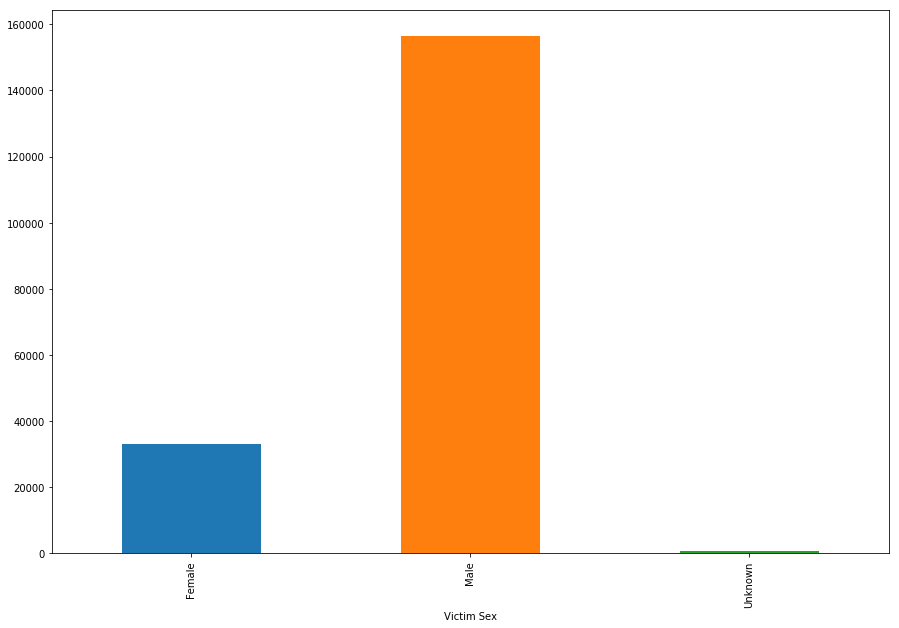

In [31]:
rel.size().plot(kind='bar')

Significant majority of victims in unsolved homicides are males.

## Month

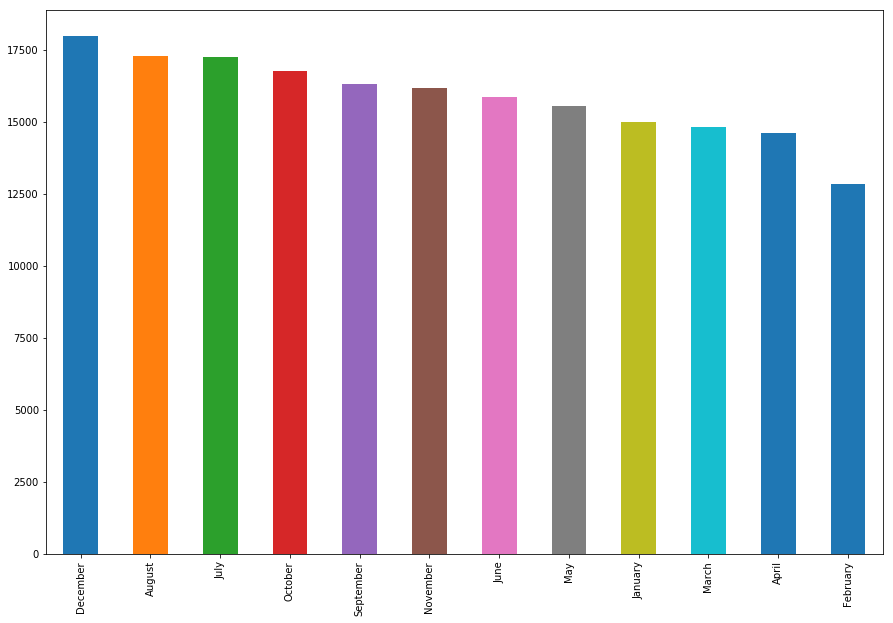

In [32]:
unsolved["Month"].value_counts().plot(kind="bar")

## Agency Type
What kind of agencies contribute to the unsolved homicide statistics? 

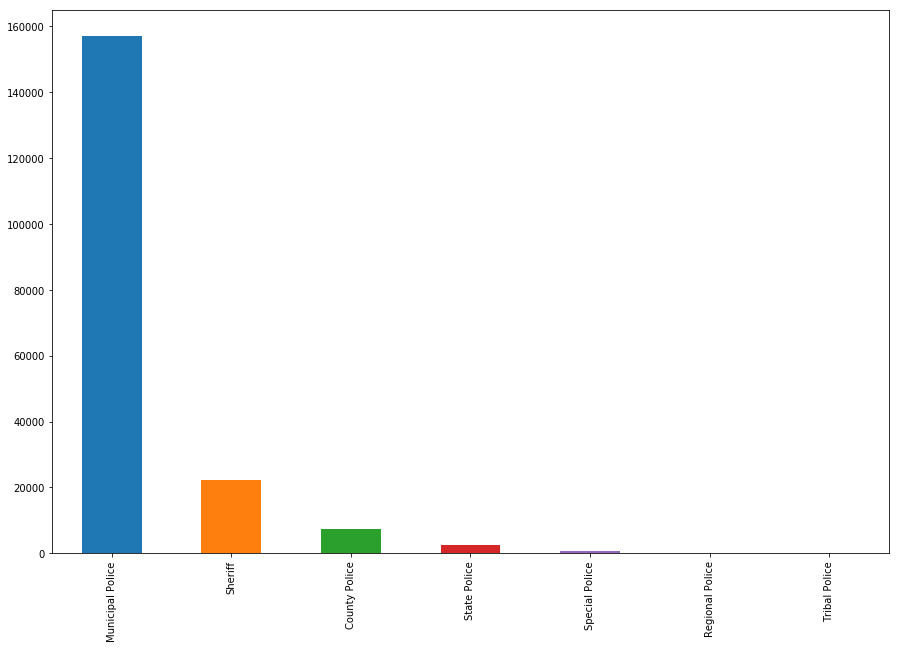

In [33]:
unsolved["Agency Type"].value_counts().plot(kind="bar")
#plt.yscale('log', nonposy='clip')

## Removing Death by Negligence

Let's remove accidental deaths

In [34]:
unsolved["Crime Type"].unique()

array(['Murder or Manslaughter', 'Manslaughter by Negligence'],
      dtype=object)

Where are potential serial killers hiding? In plain sight in large cities, or in small towns?

In [35]:
pot_sk = unsolved[unsolved["Crime Type"] == "Murder or Manslaughter"]
pot_sk.head()

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
Record ID,,,,,,,,,,,,,,,,,,,,,
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
11,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,1,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
15,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,August,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI


In [36]:
pot_sk.shape

(189894, 23)

Text(0.5,1,'Top 10 Cities: Unsolved Murders or Manslaughters')

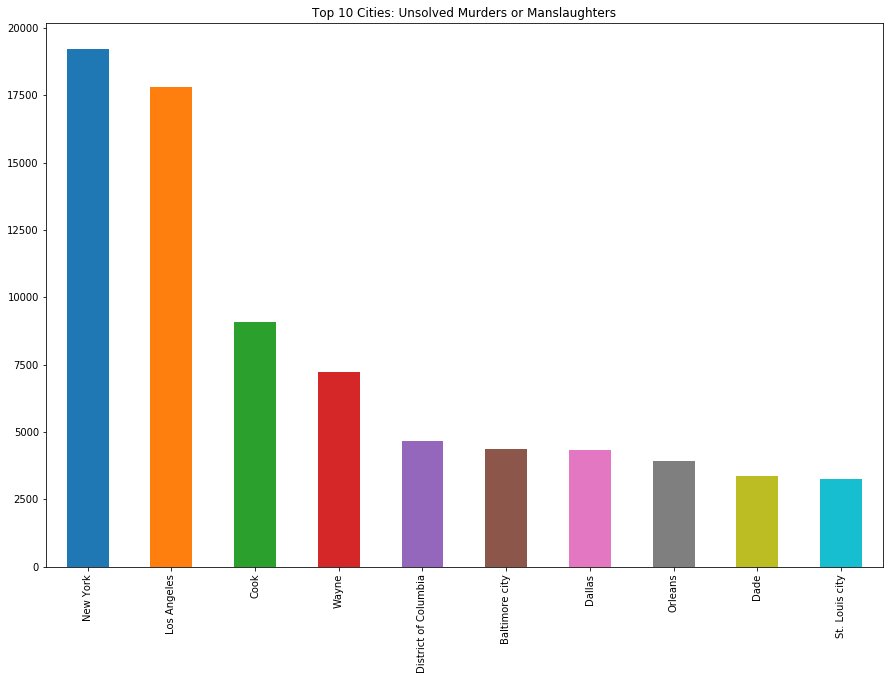

In [37]:
pot_sk["City"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Cities: Unsolved Murders or Manslaughters")

Some of the smaller cities have just 1 unsolved homicide. Serial Killers are defined as those having atleast 3 [victims](https://books.google.com/books?id=0yfoJz6jHwkC&pg=PA1#v=onepage&q&f=false). Let's put the threshold at 5 unsolved for the city.

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
Record ID,,,,,,,,,,,,,,,,,,,,,
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
11,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,1,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
15,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,August,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
27,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,February,1,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
33,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,July,1,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
34,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,July,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
35,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,July,3,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI


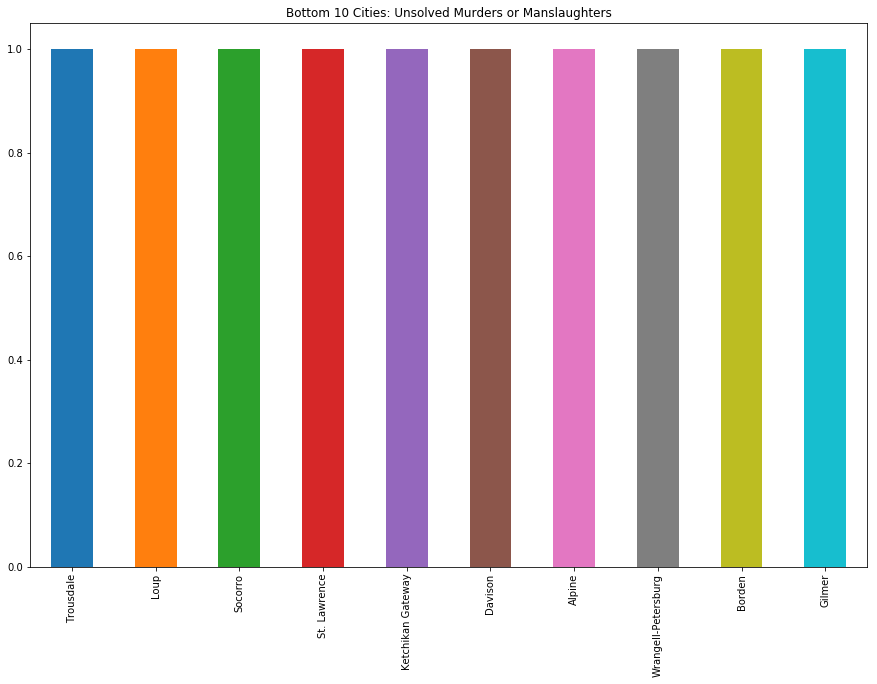

In [38]:
pot_sk["City"].value_counts().tail(10).plot(kind="bar")
plt.title("Bottom 10 Cities: Unsolved Murders or Manslaughters")

pot_sk.groupby("City").filter(lambda x: len(x)>5)

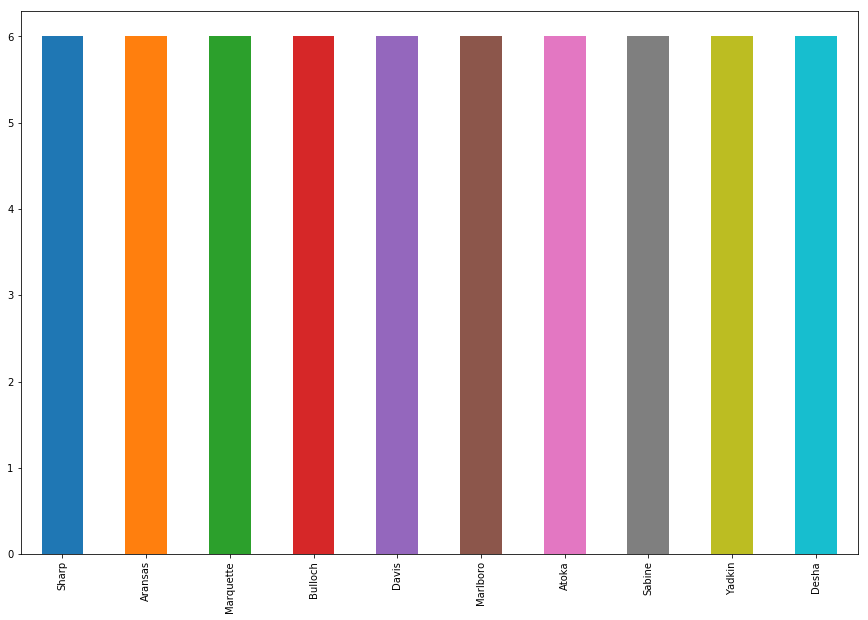

In [39]:
two_or_more = pot_sk.groupby("City").filter(lambda x: len(x)>5)
two_or_more["City"].value_counts().tail(10).plot(kind="bar")

## Exploring Relationship Between Victims and Perpetrators

In [40]:
df["Relationship"].unique()

array(['Acquaintance', 'Unknown', 'Wife', 'Stranger', 'Girlfriend',
       'Ex-Husband', 'Brother', 'Stepdaughter', 'Husband', 'Sister',
       'Friend', 'Family', 'Neighbor', 'Father', 'In-Law', 'Son',
       'Ex-Wife', 'Boyfriend', 'Mother', 'Common-Law Husband',
       'Common-Law Wife', 'Stepfather', 'Stepson', 'Stepmother',
       'Daughter', 'Boyfriend/Girlfriend', 'Employer', 'Employee'],
      dtype=object)

In [41]:
known = df[df["Relationship"] != "Unknown"]
known.head()

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
Record ID,,,,,,,,,,,,,,,,,,,,,
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,...,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI


In [42]:
known["Relationship"].value_counts()

Acquaintance            126018
Stranger                 96593
Wife                     23187
Friend                   21945
Girlfriend               16465
Son                       9904
Family                    9535
Husband                   8803
Daughter                  7539
Boyfriend                 7302
Neighbor                  6294
Brother                   5514
Father                    4361
Mother                    4248
In-Law                    3637
Common-Law Wife           2477
Ex-Wife                   1973
Common-Law Husband        1954
Boyfriend/Girlfriend      1383
Stepfather                1360
Sister                    1292
Stepson                   1170
Stepdaughter               754
Ex-Husband                 629
Employer                   509
Employee                   384
Stepmother                 211
Name: Relationship, dtype: int64

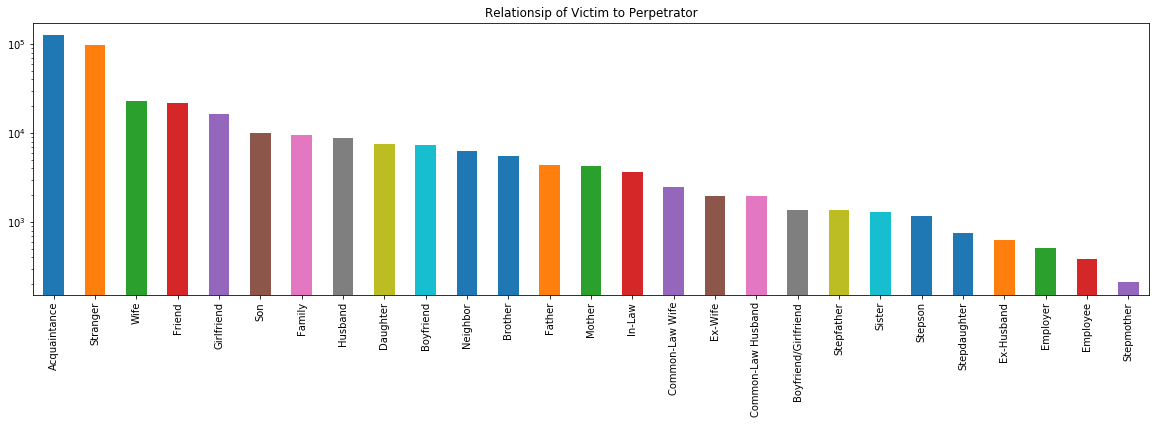

In [43]:
plt.rcParams["figure.figsize"] = (20,5)
known["Relationship"].value_counts().plot(kind="bar")
plt.title("Relationsip of Victim to Perpetrator")
plt.yscale('log', nonposy='clip')

## Race
Is there a racial angle to these homicides?

In [44]:
df.head(2)

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
Record ID,,,,,,,,,,,,,,,,,,,,,
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI


In [45]:
df["Perpetrator Race"].unique()

array(['Native American/Alaska Native', 'White', 'Unknown', 'Black',
       'Asian/Pacific Islander'], dtype=object)

In [46]:
df.columns

Index(['Agency Code', 'Agency Name', 'Agency Type', 'City', 'State', 'Year',
       'Month', 'Incident', 'Crime Type', 'Crime Solved', 'Victim Sex',
       'Victim Age', 'Victim Race', 'Victim Ethnicity', 'Perpetrator Sex',
       'Perpetrator Age', 'Perpetrator Race', 'Perpetrator Ethnicity',
       'Relationship', 'Weapon', 'Victim Count', 'Perpetrator Count',
       'Record Source'],
      dtype='object')

In [47]:
pd.pivot_table(known,index=["Victim Race","Perpetrator Race"],values=["Victim Count"],aggfunc=[np.sum])
               #columns=["Product"],aggfunc=[np.sum])

sum
                                                            Victim Count
Victim Race                   Perpetrator Race                          
Asian/Pacific Islander        Asian/Pacific Islander                1139
                              Black                                  128
                              Native American/Alaska Native            9
                              Unknown                                 48
                              White                                  309
Black                         Asian/Pacific Islander                  23
                              Black                                11316
                              Native American/Alaska Native           11
                              Unknown                                266
                              White                                 1434
Native American/Alaska Native Asian/Pacific Islander                   0
                              Black                                   27
                              Native American/Alaska Native          263
                              Unknown                                 11
                              White                                  102
Unknown                       Asian/Pacific Islander                  12
                              Black                                  118
                              Native American/Alaska Native            2
                              Unknown                                210
                              White                                  199
White                         Asian/Pacific Islander                 181
                              Black                                 3414
                              Native American/Alaska Native          206
                              Unknown                                889
                              White                                27273

It looks like most people are killed by people from their own racial background.